# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load downs FBM raw dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/fbm_ds_cite_seq/data/fbm_ds_citeseq_plus_scrna_forMS_20210119.h5ad')

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                 181
CD14 monocyte              320
CD56 bright NK              79
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   39
mast cell                   27
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                 

# Add broad annotation as metadata and accompanying colours

In [7]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/resources_for_pipelines/S_Table_26_key_downs_broad_annots.csv")

In [8]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['CAR',
 'CD14 monocyte',
 'CD56 bright NK',
 'CD8 T cell',
 'chondrocyte',
 'CMP',
 'DC1',
 'DC2',
 'DC3',
 'early B cell',
 'early erythroid',
 'early MK',
 'endothelium',
 'eo/baso/mast precursor',
 'eosinophil',
 'HSC',
 'ILC precursor',
 'late erythroid',
 'macrophage',
 'mast cell',
 'mature B cell',
 'mature NK',
 'MEMP',
 'mid erythroid',
 'MK',
 'promonocyte',
 'MSC',
 'myelocyte',
 'promyelocyte',
 'neutrophil',
 'promyelocyte',
 'osteoblast',
 'osteoclast',
 'pDC',
 'pre B cell',
 'promonocyte',
 'pre pDC',
 'MOP',
 'transitional NK cell',
 'Treg']

In [9]:
broad_annot = annot["broad_fig5A_umap_cell.labels"].tolist()
broad_annot

['stroma',
 'monocyte',
 'T/NK',
 'T/NK',
 'stroma',
 'HSC/MPP',
 'DC',
 'DC',
 'DC',
 'B_lineage',
 'erythroid',
 'MK',
 'stroma',
 'HSC/MPP',
 'eo/baso/mast',
 'HSC/MPP',
 'T/NK',
 'erythroid',
 'stroma',
 'eo/baso/mast',
 'B_lineage',
 'T/NK',
 'HSC/MPP',
 'erythroid',
 'MK',
 'monocyte',
 'stroma',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'DC',
 'B_lineage',
 'monocyte',
 'DC',
 'monocyte',
 'T/NK',
 'T/NK']

In [10]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(["mast cell ", "chondrocyte ", 
                "Treg "], ["mast cell", "chondrocyte", "Treg"])

adata.obs["broad_fig5A_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [11]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].astype('category')
adata.obs["broad_fig5A_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC/MPP', 'MK', 'T/NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [12]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].cat.reorder_categories(['HSC/MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'])

In [13]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].astype('category')
adata.obs["broad_fig5A_cell.labels"].cat.categories

Index(['HSC/MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'], dtype='object')

In [14]:
adata.obs["broad_fig5A_cell.labels"].cat.categories[2]

'MK'

In [15]:
new_colors = np.empty(len(adata.obs["broad_fig5A_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig5A_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD14 monocyte              320
CD56 bright NK              79
CD8 T cell                 181
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   66
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                  11
osteoclast                 

In [17]:
cell_numbers = adata.obs.groupby(["broad_fig5A_cell.labels"]).apply(len)
cell_numbers

broad_fig5A_cell.labels
HSC/MPP           338
erythroid       12914
MK                117
B_lineage         188
DC                505
eo/baso/mast      129
neutrophil        623
monocyte         1137
T/NK              439
stroma            353
dtype: int64

In [18]:
cell_numbers = adata.obs.groupby(["broad_fig5A_cell.labels", "cell.labels"]).apply(len)
cell_numbers

broad_fig5A_cell.labels  cell.labels           
HSC/MPP                  CMP                         50
                         HSC                        105
                         MEMP                       130
                         eo/baso/mast precursor      53
erythroid                early erythroid           1348
                         late erythroid            6336
                         mid erythroid             5230
MK                       MK                          83
                         early MK                    34
B_lineage                early B cell                42
                         mature B cell               31
                         pre B cell                 115
DC                       DC1                         45
                         DC2                        228
                         DC3                        108
                         pDC                         14
                         pre pDC                    110


# Pre-process the total dataset

In [19]:
# normalise count data 
sc.pp.normalize_total(adata)

In [20]:
# log the count data 
sc.pp.log1p(adata)

In [21]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [22]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [23]:
# run pca
sc.tl.pca(adata, n_comps=50)

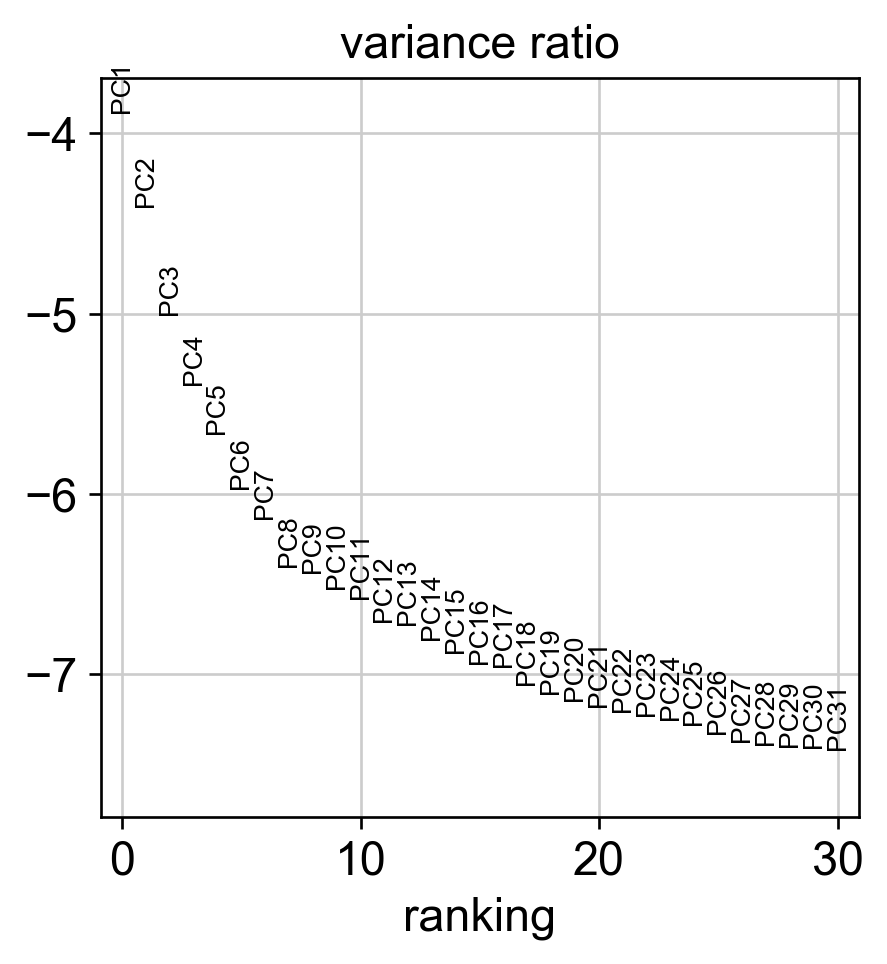

In [24]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=30) 

In [26]:
# run umap
sc.tl.umap(adata) 

... storing 'cell.labels' as categorical


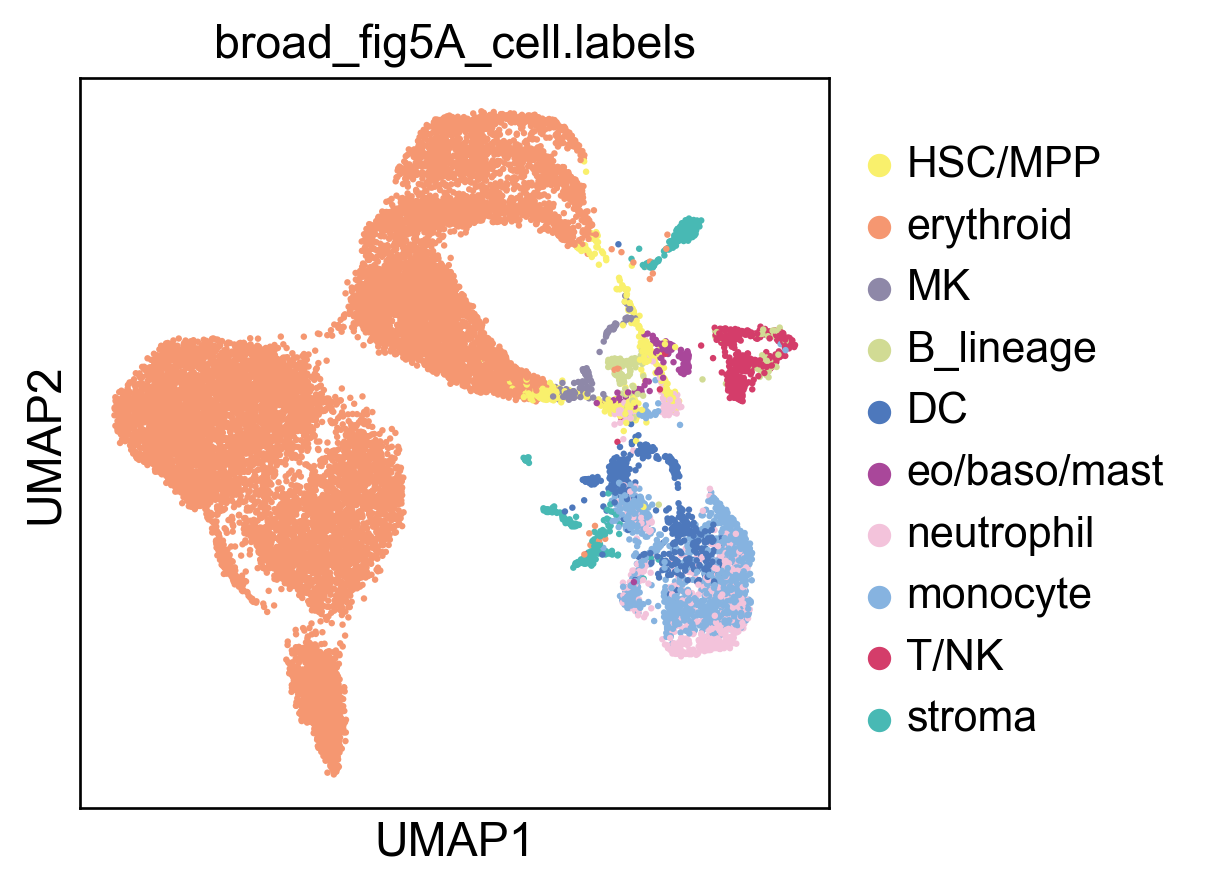

In [27]:
sc.pl.umap(adata, color=['broad_fig5A_cell.labels'], size=15) 

In [28]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_pre-harmony_20210119_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_pre-harmony_20210119_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_pre-harmony_20210119_labels_broad_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_pre-harmony_20210119_labels_broad_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_pre-harmony_20210119_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_pre-harmony_20210119_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_pre-harmony_20210119_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_pre-harmony_20210119_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Run harmony batch correction

In [29]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [30]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [31]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

In [32]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add UMAP 

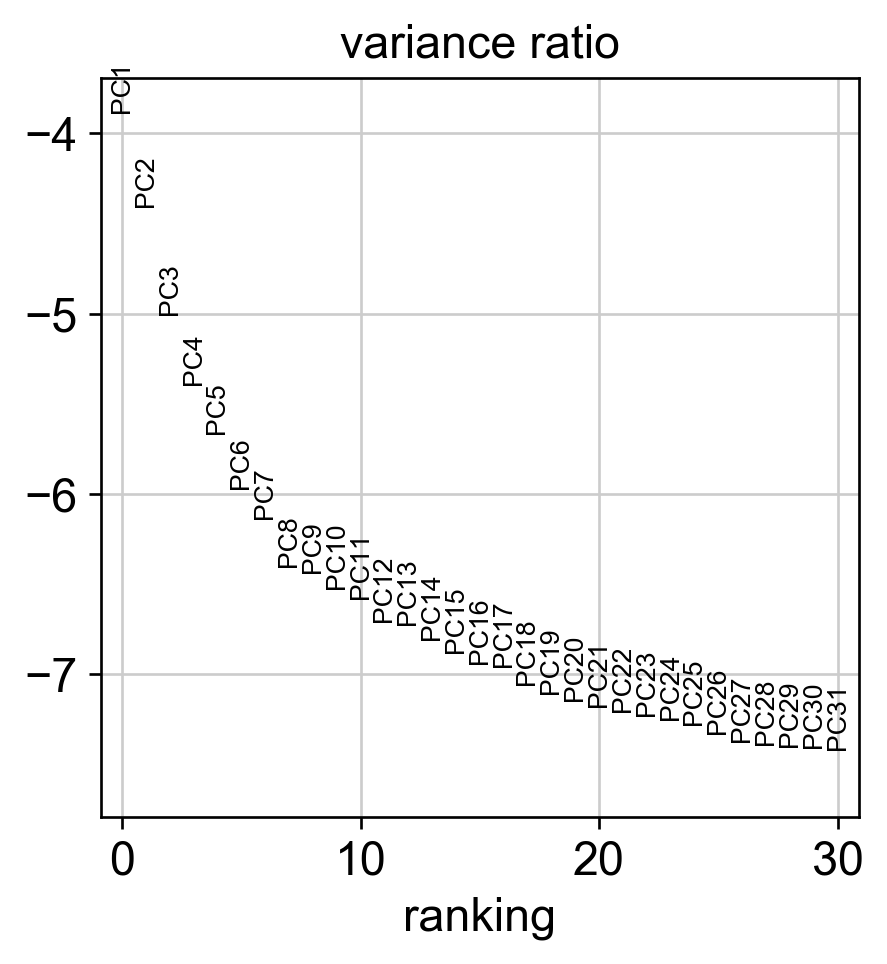

In [33]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [34]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20) 

In [35]:
# run umap
sc.tl.umap(adata) 

# Plot UMAP

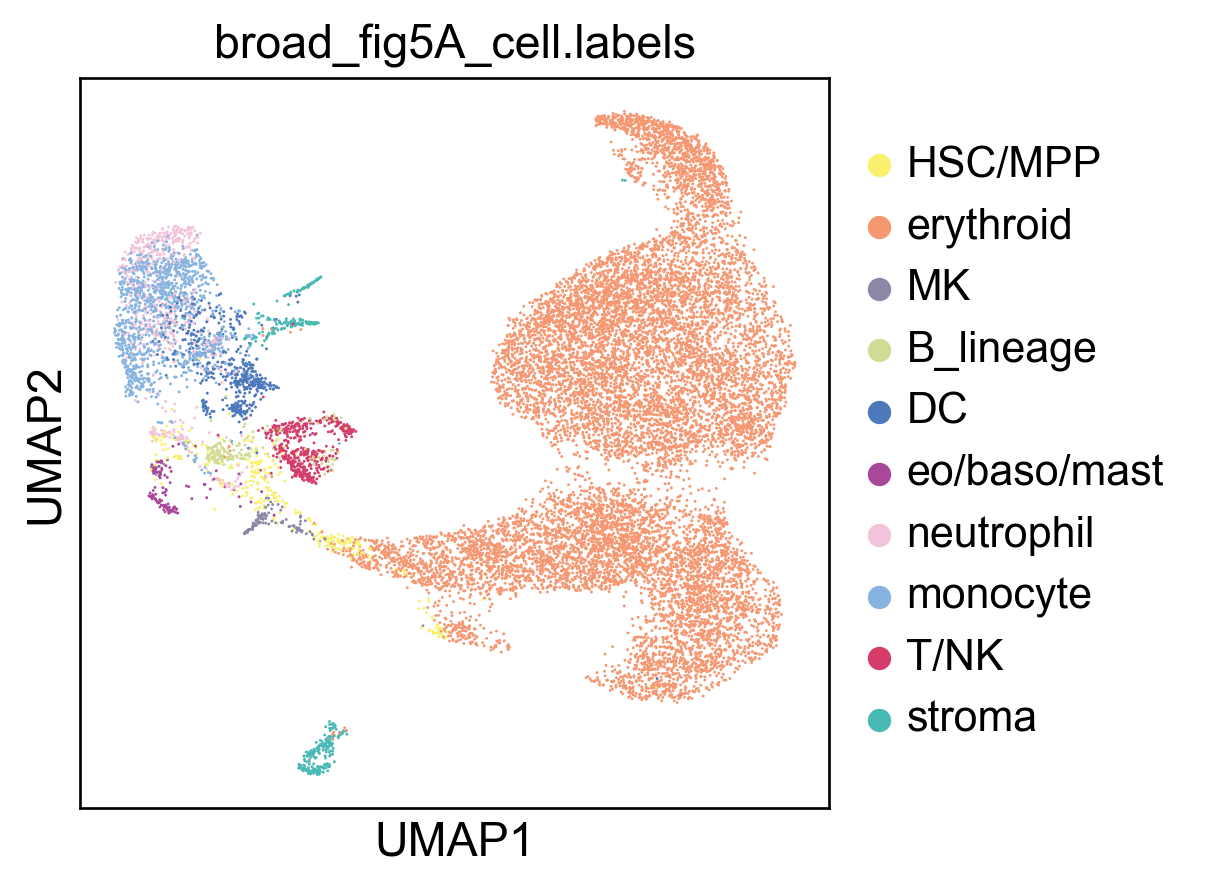

In [36]:
sc.pl.umap(adata, color=['broad_fig5A_cell.labels'], size=3)

In [37]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20210119_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20210119_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_post-harmony_20210119_labels_broad_legoff.pdf', show=False, size=5) 
sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_post-harmony_20210119_labels_broad_legon.pdf', show=False, size=5, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_post-harmony_20210119_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_post-harmony_20210119_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20210119_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20210119_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [38]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [39]:
adata.X

<16743x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 25035586 stored elements in Compressed Sparse Row format>

In [40]:
adata.raw.X

AttributeError: 'NoneType' object has no attribute 'X'

In [41]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig5a_downs_fbm_scaled_gex_updated_dr_20210119.h5ad")

In [42]:
adata.shape

(16743, 33694)

# Recolour UMAP for new categories

# Import packages and data 

In [19]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load downs FBM raw dataset

In [22]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig5a_downs_fbm_scaled_gex_updated_dr_20210119.h5ad")

# Add broad annotation as metadata and accompanying colours

In [23]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/resources_for_pipelines/S_Table_26_key_downs_broad_annots.csv")

In [24]:
annot["cell.labels"] = annot["cell.labels"].replace(['early erythroid', 'mid erythroid', 'late erythroid'], 
                                      ['early erythroid-', 'mid erythroid-', 'late erythroid-'])

refined_annot = annot["cell.labels"].tolist()

refined_annot

['CAR',
 'CD14 monocyte',
 'CD56 bright NK',
 'CD8 T cell',
 'chondrocyte',
 'CMP',
 'DC1',
 'DC2',
 'DC3',
 'early B cell',
 'early erythroid-',
 'early MK',
 'endothelium',
 'eo/baso/mast precursor',
 'eosinophil',
 'HSC',
 'ILC precursor',
 'late erythroid-',
 'macrophage',
 'mast cell',
 'mature B cell',
 'mature NK',
 'MEMP',
 'mid erythroid-',
 'MK',
 'promonocyte',
 'MSC',
 'myelocyte',
 'promyelocyte',
 'neutrophil',
 'promyelocyte',
 'osteoblast',
 'osteoclast',
 'pDC',
 'pre B cell',
 'promonocyte',
 'pre pDC',
 'MOP',
 'transitional NK cell',
 'Treg']

In [25]:
broad_annot = annot["broad_fig5A_umap_cell.labels"].tolist()
broad_annot

['stroma',
 'monocyte',
 'T/NK',
 'T/NK',
 'stroma',
 'HSC/MPP',
 'DC',
 'DC',
 'DC',
 'B_lineage',
 'erythroid',
 'MK',
 'stroma',
 'HSC/MPP',
 'eo/baso/mast',
 'HSC/MPP',
 'T/NK',
 'erythroid',
 'stroma',
 'eo/baso/mast',
 'B_lineage',
 'T/NK',
 'HSC/MPP',
 'erythroid',
 'MK',
 'monocyte',
 'stroma',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'DC',
 'B_lineage',
 'monocyte',
 'DC',
 'monocyte',
 'T/NK',
 'T/NK']

In [26]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(["mast cell ", "chondrocyte ", 
                "Treg "], ["mast cell", "chondrocyte", "Treg"])

adata.obs["broad_fig5A_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [27]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].astype('category')
adata.obs["broad_fig5A_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC/MPP', 'MK', 'T/NK', 'early erythroid', 'eo/baso/mast', 'late erythroid', 'mid erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [28]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].cat.reorder_categories(['HSC/MPP', 
            'early erythroid',  'mid erythroid', 'late erythroid', 
            'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'])

In [29]:
adata.obs["broad_fig5A_cell.labels"] = adata.obs["broad_fig5A_cell.labels"].astype('category')
adata.obs["broad_fig5A_cell.labels"].cat.categories

Index(['HSC/MPP', 'early erythroid', 'mid erythroid', 'late erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'], dtype='object')

In [30]:
adata.obs["broad_fig5A_cell.labels"].cat.categories[2]

'mid erythroid'

In [31]:
new_colors = np.empty(len(adata.obs["broad_fig5A_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#F4A03B' # early erythroid
new_colors[[2]] = '#E47625' # mid erythroid
new_colors[[3]] = '#A84924' # late erythroid
new_colors[[4]] = '#8e88a8' # MK
new_colors[[5]] = '#d1db94' # B lineage
new_colors[[6]] = '#4d78bc' # DC
new_colors[[7]] = '#a9479a' # eo/baso/mast
new_colors[[8]] = '#f3c3db' # neutrophil
new_colors[[9]] = '#86b3e0' # monocyte
new_colors[[10]] = '#d43d6a' # TNK
new_colors[[11]] = '#48b9b4' # stroma

adata.uns["broad_fig5A_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#F4A03B', '#E47625', '#A84924', '#8e88a8', '#d1db94',
       '#4d78bc', '#a9479a', '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'],
      dtype=object)

In [32]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                 181
CD14 monocyte              320
CD56 bright NK              79
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   66
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                  11
osteoclast                 

In [33]:
cell_numbers = adata.obs.groupby(["broad_fig5A_cell.labels"]).apply(len)
cell_numbers

broad_fig5A_cell.labels
HSC/MPP             338
early erythroid    1348
mid erythroid      5230
late erythroid     6336
MK                  117
B_lineage           188
DC                  505
eo/baso/mast        129
neutrophil          623
monocyte           1137
T/NK                439
stroma              353
dtype: int64

In [34]:
cell_numbers = adata.obs.groupby(["broad_fig5A_cell.labels", "cell.labels"]).apply(len)
cell_numbers

broad_fig5A_cell.labels  cell.labels           
HSC/MPP                  CMP                         50
                         HSC                        105
                         MEMP                       130
                         eo/baso/mast precursor      53
early erythroid          early erythroid           1348
mid erythroid            mid erythroid             5230
late erythroid           late erythroid            6336
MK                       MK                          83
                         early MK                    34
B_lineage                early B cell                42
                         mature B cell               31
                         pre B cell                 115
DC                       DC1                         45
                         DC2                        228
                         DC3                        108
                         pDC                         14
                         pre pDC                    110


# Plot UMAP

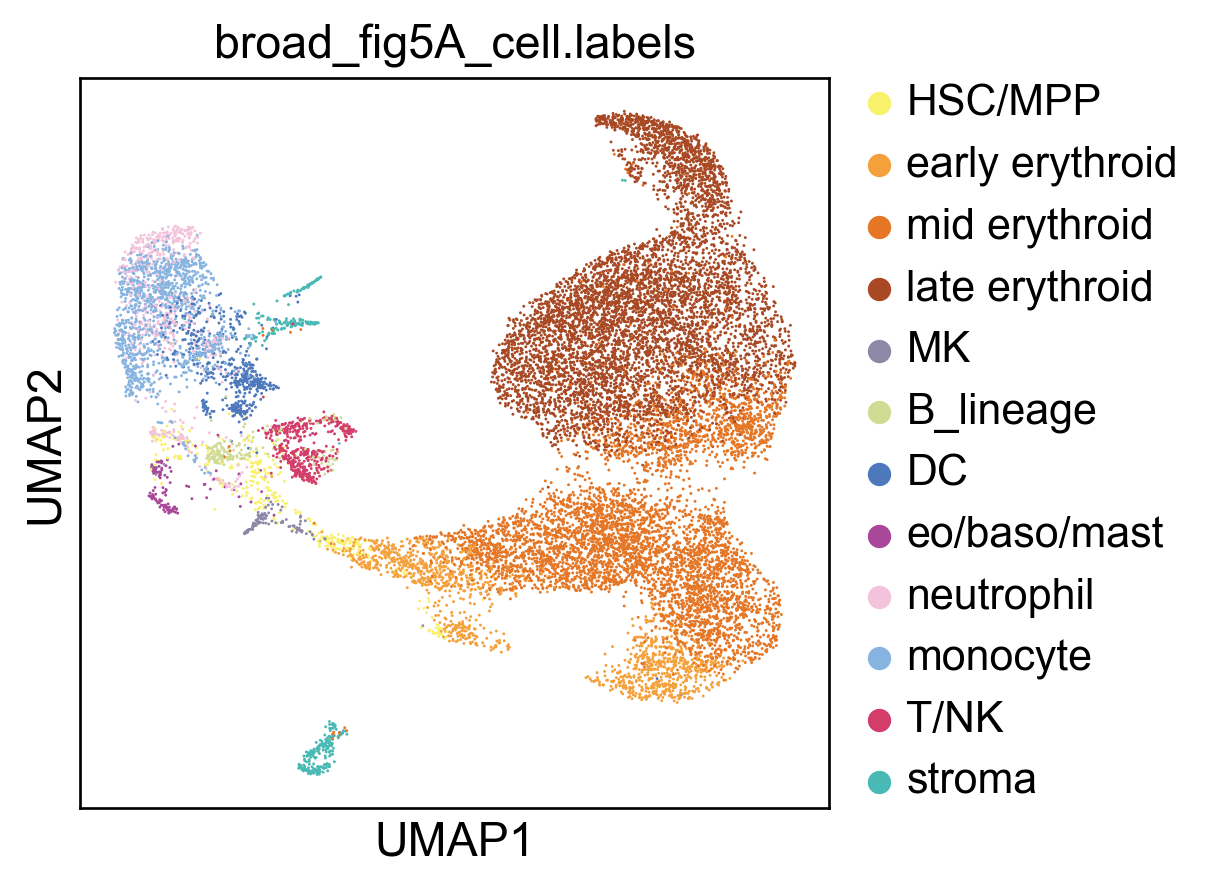

In [35]:
sc.pl.umap(adata, color=['broad_fig5A_cell.labels'], size=3)

In [38]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20210215_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20210215_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_post-harmony_20210215_labels_broad_legoff.pdf', show=False, size=5) 
sc.pl.umap(adata, color='broad_fig5A_cell.labels', save='_downs_fbm_post-harmony_20210215_labels_broad_legon.pdf', show=False, size=5, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='lanes', save='_downs_fbm_post-harmony_20210215_lane_legoff.pdf', show=False, size=5) 
sc.pl.umap(adata, color='lanes', save='_downs_fbm_post-harmony_20210215_lane_legon.pdf', show=False, size=5, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20210215_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20210215_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)